# Framework to break down CT CSVs
--- 

## Clinical Trials Requirements

- Phase 1, Phase 2, Phase 3

Create repo
push code
work in branches 

## Key variables to examine 

**All data**

Analyse completed phase 3 trials 

Analyse current Phase 3 trials 

 - Distribution of enrollment across phases
 - Distribution of intervention types 
 - Outcomes
 - Examination of completed trials 

In [79]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Import CSV File 

In [97]:
def import_csv(filepath): 
    file = filepath
    data = pd.read_csv(file, ',')
    data = data.set_index('Rank')
    return data

## must assign data to variable 

# example 
data = import_csv('/Users/cameronsellers/code/sellerc97/data-challenges/Clinical Challenges/data/NASH_LIVER.csv')

## Tidy columns 
---

**Funded Bys** 

- Converts 'Other|Industry' into 'Industry|Other'.
- Converts 'NIH|Industry' into 'Industry|NIH'

**Phases** 

- Convets any mixed Phases into ascendign numerical order (eg Phase 2|Phase 1 becomes Phase 1|Phase 2) 

**DateTime** 

- Converts all time columns into DateTime 



In [11]:
def clean(data): 

            # Funded Bys 
            data = data.replace('Other|Industry', 'Industry|Other').replace('NIH|Other', 'NIH').replace('Other|NIH', 'NIH')

            # Phase clean 
            data = data.replace('Phase 2|Phase 1', 'Phase 1|Phase 2').replace('Phase 3|Phase 2', 'Phase 2|Phase 3')

            # DateTime conversion
            dates = ['Start Date', 'Primary Completion', 'Completion Date', 'Study Completion' \
                    'First Posted', 'Last Update Posted', 'Results First Posted']

            for d in dates:
                if d in data.columns: 
                    data[d] = pd.to_datetime(data[d])

            return data 

data = clean(data)

# Break by Phases

- Not exclusive catergories! 
- If trial listed as "Phase 1 | Phase 2" this code will take the same trial twice into "Phase_1" and "Phase_2"

In [66]:
## Currently Phase 1/2 placed into Phase 2 columns, Phase 2/3 placed into Phase 3 columns etc. 

def Phase_extract(data, Phase=None): 
    
    if Phase == 1:

        Phase_1 = data['Phases'].str.endswith('Phase 1')
        Phase_1 = data[Phase_1].set_index('Rank')
        return Phase_1
    
    elif Phase == 2:

        Phase_2 = data['Phases'].str.endswith('Phase 2')
        Phase_2 = data[Phase_2].set_index('Rank')
        return Phase_2
    
    elif Phase == 3:
        
        Phase_3 = data['Phases'].str.endswith('Phase 3')
        Phase_3 = data[Phase_3].set_index('Rank')
        return Phase_3
    
    elif Phase == 4: 
        Phase_4 = data['Phases'].str.contains('Phase 4')
        Phase_4 = data[Phase_4].set_index('Rank')
        return Phase_4
    
    else:
        return Phase_1, Phase_2, Phase_3, Phase_4
    

Phase_1 = Phase_split(data, 1)
Phase_2 = Phase_split(data, 2)
Phase_3 = Phase_split(data, 3)
Phase_4 = Phase_split(data, 4)

## Plot trials by Phase

Returns pie chart of trials by Phase

- Enter the highest phase number in data set
- eg to plot Phases 1-3, enter phase_pie(3) - Phase 4 data will be excluded. 


([<matplotlib.patches.Wedge at 0x11b63e5d0>,
 [Text(-0.5142301410357144, 0.9724028805234944, 'Phase 1'),
  Text(-0.5723703965036796, -0.9393572958178483, 'Phase 2'),
  Text(0.9451095063617202, 0.5628214823411646, 'Phase 3')],
 [Text(-0.28048916783766237, 0.5304015711946333, '15.5%'),
  Text(-0.3122020344565525, -0.5123767068097355, '51.6%'),
  Text(0.5155142761973018, 0.30699353582245337, '32.9%')])

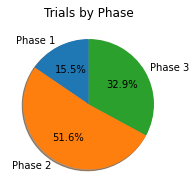

In [68]:
def phase_pie(Phases): 
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    Z = [len(Phase_1), len(Phase_2), len(Phase_3), len(Phase_4)]
    L = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
    pie_data = Z[0:Phases]
    labels = L[0:Phases]
    pie = ax.pie(pie_data, labels=labels, shadow=True,\
                     startangle=90, autopct='%1.1f%%')
    
    ax.set_title("Trials by Phase")
    #ax.legend(Phases, Phases),title="Phases",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1)
     
    return pie

phase_pie(3)

# Isolate trials by completed or ongoing 

- Takes 'completed' trials to be Status "Completed, Terminated, Withdrawn or Suspended" 
- Takes 'ongoing' trials to mean "Not yet Recruiting, Recruiting, Active not recruting" 

In [16]:
## Isolate active and finished trials using a Boolean Mask 

def active_or_complete(data): 
    complete = data[(data['Status'].str.contains('Completed')) | (data['Status'].str.contains('Terminated')) | (data['Status'].str.contains('Withdrawn')) | (data['Status'].str.contains('Suspended'))]
    complete = "complete_{}".format(data)
    ongoing = data[(data['Status'].str.contains('Recruiting')) | (data['Status'].str.contains('Active, not recruiting')) | (data['Status'].str.contains('Not yet recruiting'))]
    ongoing = "ongoing_{}".format(data)
    return data

aoc_all = active_or_complete(data)
aoc_phase1 = active_or_complete(Phase_1)
aoc_phase2 = active_or_complete(Phase_2)
aoc_phase3 = active_or_complete(Phase_3)
aoc_phase4 = active_or_complete(Phase_4)

# Isolate by type of intervention

- Insert keyword to find trials based on intervention. 
- Common keywords include:

> Drug
  
> Biological 

> Supplement 

> Drug name 

In [63]:
def sort_intervention(data, keyword, keyword2=None):
    if keyword2 == None:
        intervention_trials = data[(data['Interventions'].str.contains('keyword'))]
        return intervention_trials
    else:
        intervention_trials = data[(data['Interventions'].str.contains('keyword')) | (data['Interventions'].str.contains('keyword2'))]
    return intervention_trials

In [6]:
## Real example w Phase 3 data

Phase_3_complete = Phase_3[(Phase_3['Status'].str.contains('Completed')) | (Phase_3['Status'].str.contains('Terminated')) | (Phase_3['Status'].str.contains('Withdrawn')) | (Phase_3['Status'].str.contains('Suspended'))]
Phase_3_ongoing = Phase_3[(Phase_3['Status'].str.contains('Recruiting')) | (Phase_3['Status'].str.contains('Active, not recruiting')) | (Phase_3['Status'].str.contains('Not yet recruiting'))]

## Isolate Drug Interventions by searching for Drug and Biological labels 

Phase_3_complete = Phase_3_complete[(Phase_3['Interventions'].str.contains('Drug:')) | (Phase_3['Interventions'].str.contains('Biological:'))]
Phase_3_ongoing = Phase_3_ongoing[(Phase_3['Interventions'].str.contains('Drug:')) | (Phase_3['Interventions'].str.contains('Biological:'))]


/Users/cameronsellers/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/cameronsellers/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


**Analysis of ongoing/prospective drug trials** 

- Intervention types
- Outcomes measured

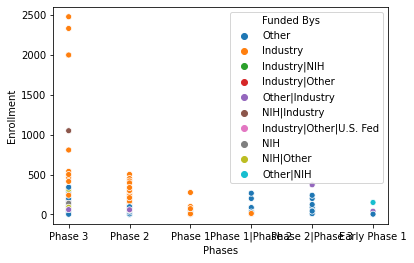

In [98]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x="Phases", y="Enrollment",
                     hue='Funded Bys',
                     sizes=(10, 200),
                     data=data)

In [8]:
## Convert dates to datetime 

Phase_3_complete['Start Date'] = pd.to_datetime(Phase_3_complete['Start Date'])
Phase_3_complete['Completion Date'] = pd.to_datetime(Phase_3_complete['Completion Date'])


## Dataset overview 

**Overview**

- 155 trials 

**Enrollment**

- Mean 203 patients. 
- Maxmimum 2480 patients 

**Phase 3** 

- Mean enrollment = 432 
- Total trials = 51
- Total drug trials = 41
- Complete drug trials = 29 
- Ongoing drug trials = 12

**Phase 2** 

- Mean = 108

**Phase 1** 

- Mean = 53

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

axs[0].bar(Phase_3['Phases'], Phase_3['Enrollment'])
axs[1].bar(Phase_2['Phases'], Phase_2['Enrollment'])
axs[2].bar(Phase_1['Phases'], Phase_1['Enrollment'])